# Neural Networks

To make a neural network using Keras first you create an instance of the Sequential class, then you call add on the Sequential object to add layers. The layers are instances of the Dense class which represents a fully connected layer with a specified number of neurons.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, activation='relu',input_dim=2))
model.add(Dense(1))

When all the layers are added the next step is to compile and specify attributes such as which optimizer and loss function to use during training.

In [2]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

loss = 'mae' means that keras will use mean absolute error to measure loss

metrics = ['mae'] means that keras will capture MAE values and use it after training is complete to judge the efficacy of the training

In [3]:
#hist = model.fit(x,y, epochs=100, batch_size=100, validation_split=0.2)

The fit method returns a history object containing the training and validation metrics specified in the metrics parameter passed to the compile method, for example metrics=['mae'] captures MAE at the end of each epoch. The greater the gap between the training and validation accuracy, the greater the likelihood that the network is overfitting.

In [4]:
#prediction = mode.predict(np.array([[2,2]])

## Sizing a Neural Network

A neural network is defined by the number of layers (the depth), the number of neurons in each layer (the width of the layeres), the types of layers, and the activation functions used. When designing a network it is important that you pick the minimum width and depth which achives the accuracy required. There are a few guidelines when making this choice:
1. Greater widths and depths give the network more capacity to "learn" by fitting more tightly to the training data but also increase the risk of overfitting. The simplest way to loosen the fit is to reduce the number of neurons.
2. Generarly it is better to have greater width than greater depth to avoid the vanishing gradient problem.
3. Fewer neurons means less training time

## Using a Neural Network to Predict Taxi Fares

In [5]:
import pandas as pd

df = pd.read_csv('Data/taxi-fares.csv', parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


In [6]:
from math import sqrt

df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)

for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.head()

,fare_amount,day_of_week,pickup_time,distance
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493
9,8.9,3.0,16.0,1.365739


In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,217 (1.01 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.8941 - mae: 2.8941 - val_loss: 2.6071 - val_mae: 2.6071
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3912 - mae: 2.3912 - val_loss: 2.3676 - val_mae: 2.3676
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3865 - mae: 2.3865 - val_loss: 2.3683 - val_mae: 2.3683
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3792 - mae: 2.3792 - val_loss: 2.3543 - val_mae: 2.3543
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3693 - mae: 2.3693 - val_loss: 2.4493 - val_mae: 2.4493
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3600 - mae: 2.3600 - val_loss: 2.3712 - val_mae: 2.3712
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3589 - mae: 2.3589 - val_loss: 2.3608 - val_mae: 2.3608
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3808 - mae: 2.3808 - val_loss: 2.3597 - val_mae: 2.3597
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

[]

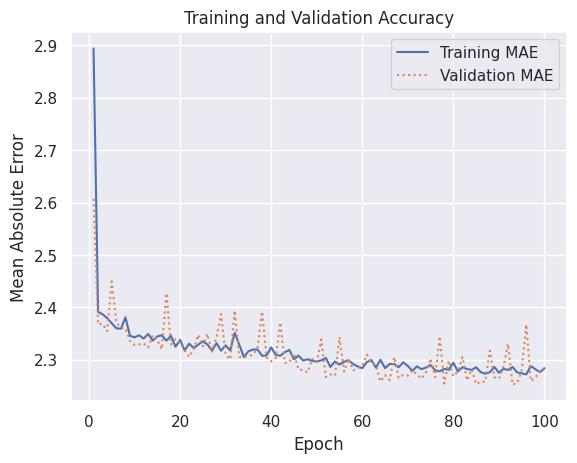

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [16]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x))

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.7535713835032505